In [17]:
import pandas as pd 

music_data = pd.read_csv('musicdata.csv')
print(music_data.head())



   Unnamed: 0                                   Track Name  \
0           0                                Bijlee Bijlee   
1           1                                  Expert Jatt   
2           2  Kaun Nachdi (From "Sonu Ke Titu Ki Sweety")   
3           3                                  Na Na Na Na   
4           4                                  Patiala Peg   

                      Artists                         Album Name  \
0               Harrdy Sandhu                      Bijlee Bijlee   
1                       Nawab                        Expert Jatt   
2  Guru Randhawa, Neeti Mohan   High Rated Gabru - Guru Randhawa   
3                      J Star                        Na Na Na Na   
4              Diljit Dosanjh  Do Gabru - Diljit Dosanjh & Akhil   

                 Album ID                Track ID  Popularity Release Date  \
0  3tG0IGB24sRhGFLs5F1Km8  1iZLpuGMr4tn1F5bZu32Kb          70   2021-10-30   
1  2gibg5SCTep0wsIMefGzkd  7rr6n1NFIcQXCsi43P0YNl          65 

In [18]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        100 non-null    int64  
 1   Track Name        94 non-null     object 
 2   Artists           94 non-null     object 
 3   Album Name        94 non-null     object 
 4   Album ID          100 non-null    object 
 5   Track ID          100 non-null    object 
 6   Popularity        100 non-null    int64  
 7   Release Date      100 non-null    object 
 8   Duration (ms)     100 non-null    int64  
 9   Explicit          100 non-null    bool   
 10  External URLs     100 non-null    object 
 11  Danceability      100 non-null    float64
 12  Energy            100 non-null    float64
 13  Key               100 non-null    int64  
 14  Loudness          100 non-null    float64
 15  Mode              100 non-null    int64  
 16  Speechiness       100 non-null    float64
 17

In [19]:
print(music_data.describe())

       Unnamed: 0  Popularity  Duration (ms)  Danceability     Energy  \
count  100.000000  100.000000     100.000000    100.000000  100.00000   
mean    49.500000   50.950000  210543.180000      0.767210    0.79763   
std     29.011492   16.496326   37961.050214      0.085302    0.11572   
min      0.000000    0.000000  141862.000000      0.501000    0.47700   
25%     24.750000   46.000000  186098.500000      0.714750    0.71125   
50%     49.500000   56.500000  205076.000000      0.772000    0.81700   
75%     74.250000   62.000000  226079.000000      0.826500    0.88125   
max     99.000000   72.000000  367818.000000      0.959000    0.98800   

             Key    Loudness       Mode  Speechiness  Acousticness  \
count  100.00000  100.000000  100.00000   100.000000    100.000000   
mean     4.54000   -4.399930    0.43000     0.115615      0.165559   
std      3.64434    1.612703    0.49757     0.075819      0.152536   
min      0.00000   -8.272000    0.00000     0.029400      0.00

In [20]:
music_data.isnull().sum()

Unnamed: 0          0
Track Name          6
Artists             6
Album Name          6
Album ID            0
Track ID            0
Popularity          0
Release Date        0
Duration (ms)       0
Explicit            0
External URLs       0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
dtype: int64

In [24]:
music_data_cleaned = music_data.drop(columns=['Unnamed: 0'])
print(music_data_cleaned)



                                     Track Name  \
0                                 Bijlee Bijlee   
1                                   Expert Jatt   
2   Kaun Nachdi (From "Sonu Ke Titu Ki Sweety")   
3                                   Na Na Na Na   
4                                   Patiala Peg   
..                                          ...   
95                                          NaN   
96                               Move Your Lakk   
97                    Patola (From "Blackmail")   
98            Ban Ja Rani (From "Tumhari Sulu")   
99          Hauli Hauli (From "De De Pyaar De")   

                                    Artists  \
0                             Harrdy Sandhu   
1                                     Nawab   
2                Guru Randhawa, Neeti Mohan   
3                                    J Star   
4                            Diljit Dosanjh   
..                                      ...   
95                                      NaN   
96  Diljit 

In [25]:
columns_with_missing_values = ['Track Name', 'Artists', 'Album Name']
music_data_cleaned[columns_with_missing_values] = music_data_cleaned[columns_with_missing_values].fillna('Unknown')

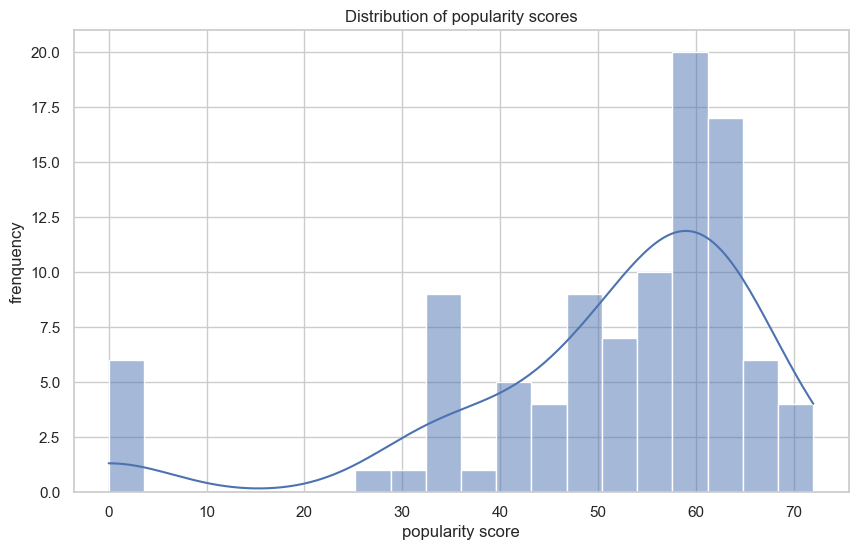

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(music_data_cleaned['Popularity'],  bins=20, kde=True)
plt.title('Distribution of popularity scores')
plt.xlabel('popularity score')
plt.ylabel('frenquency')
plt.show()

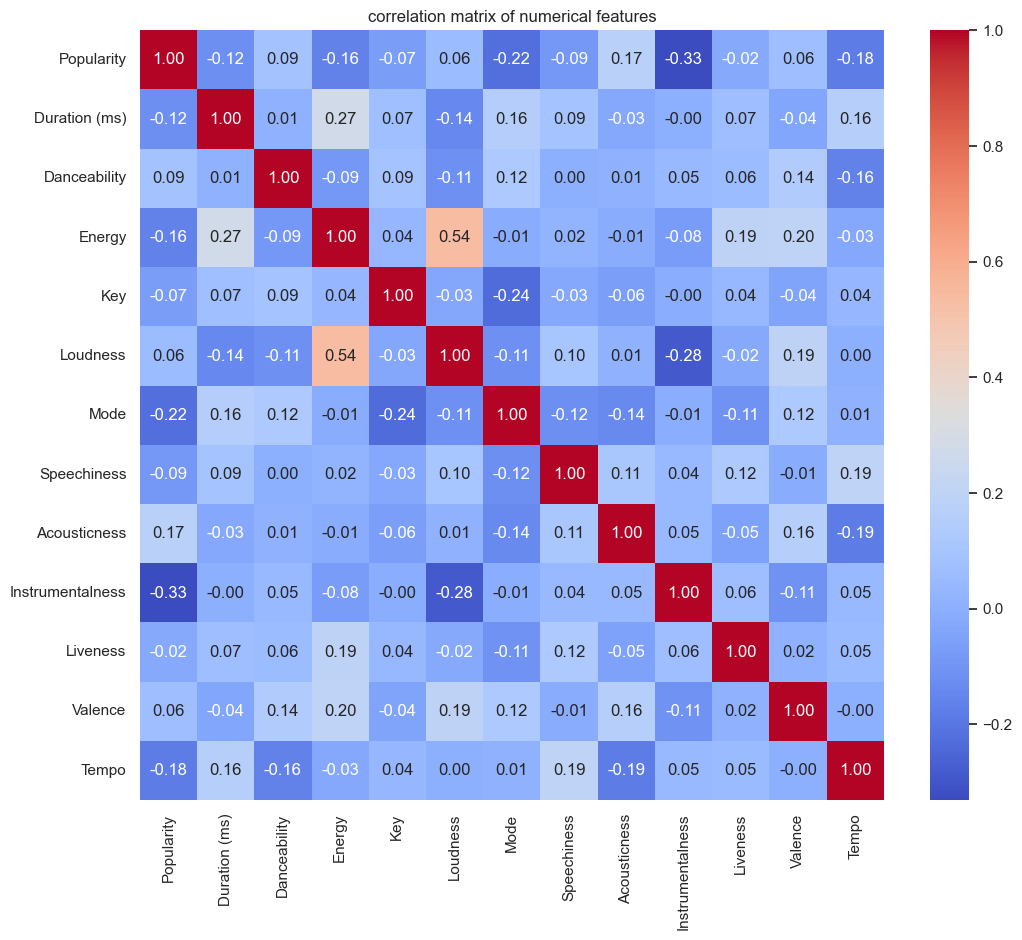

In [28]:
plt.figure(figsize=(12,10))
correlation_matrix = music_data_cleaned.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation matrix of numerical features')
plt.show()

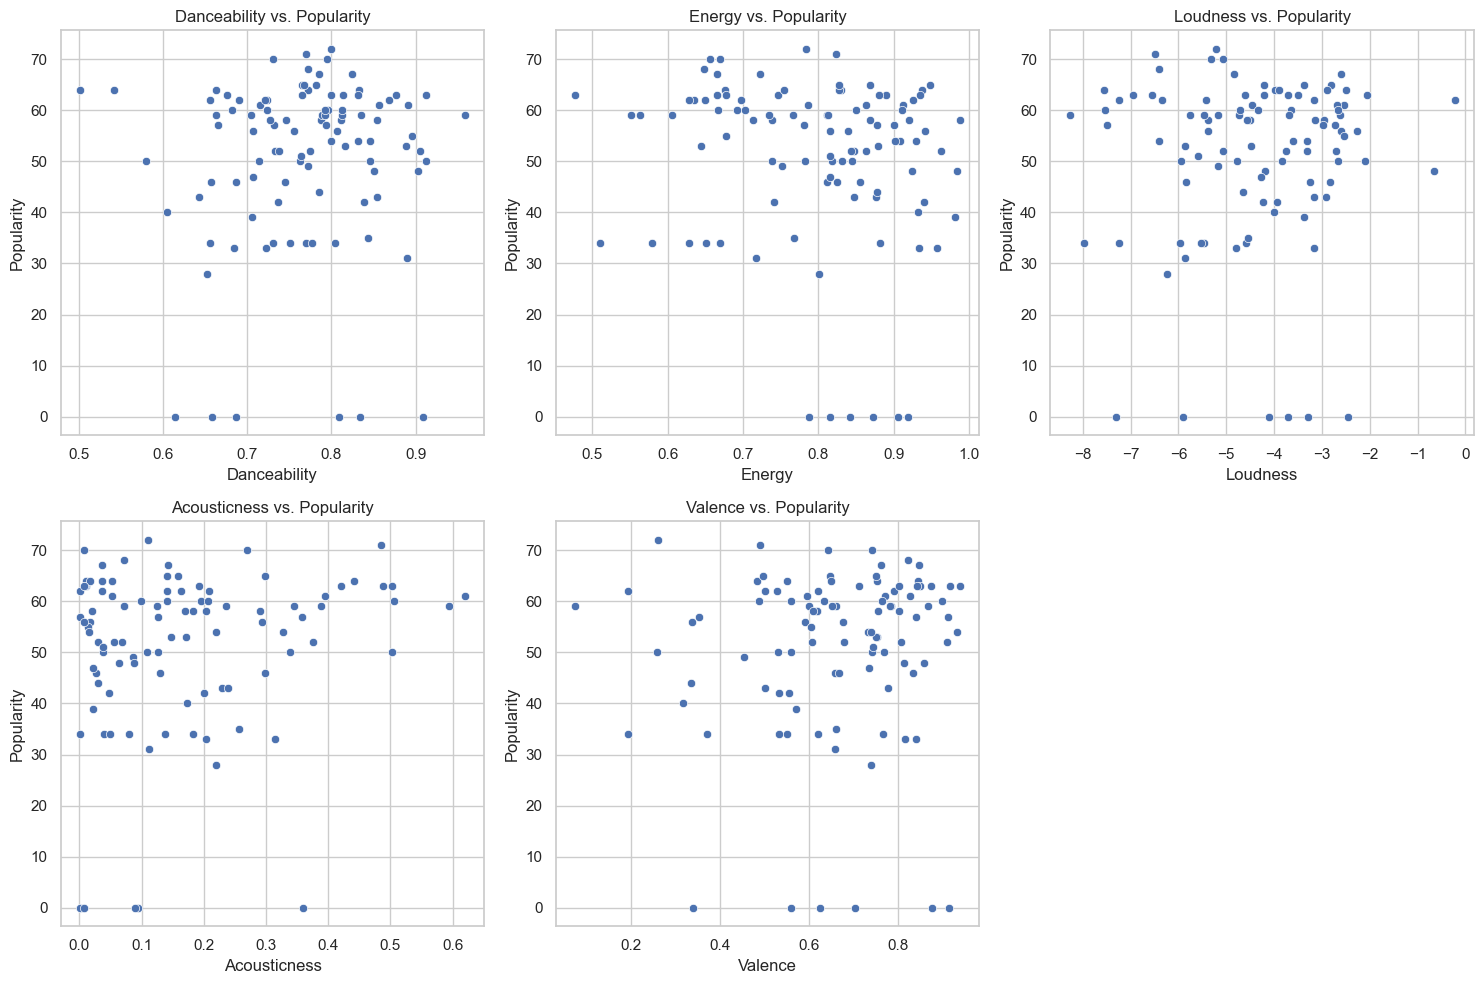

In [36]:
features = ['Danceability', 'Energy', 'Loudness', 'Acousticness', 'Valence']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=music_data_cleaned[feature], y=music_data_cleaned['Popularity'])
    plt.title(f'{feature} vs. Popularity')
    plt.xlabel(feature)
    plt.ylabel('Popularity')

plt.tight_layout()
plt.show()

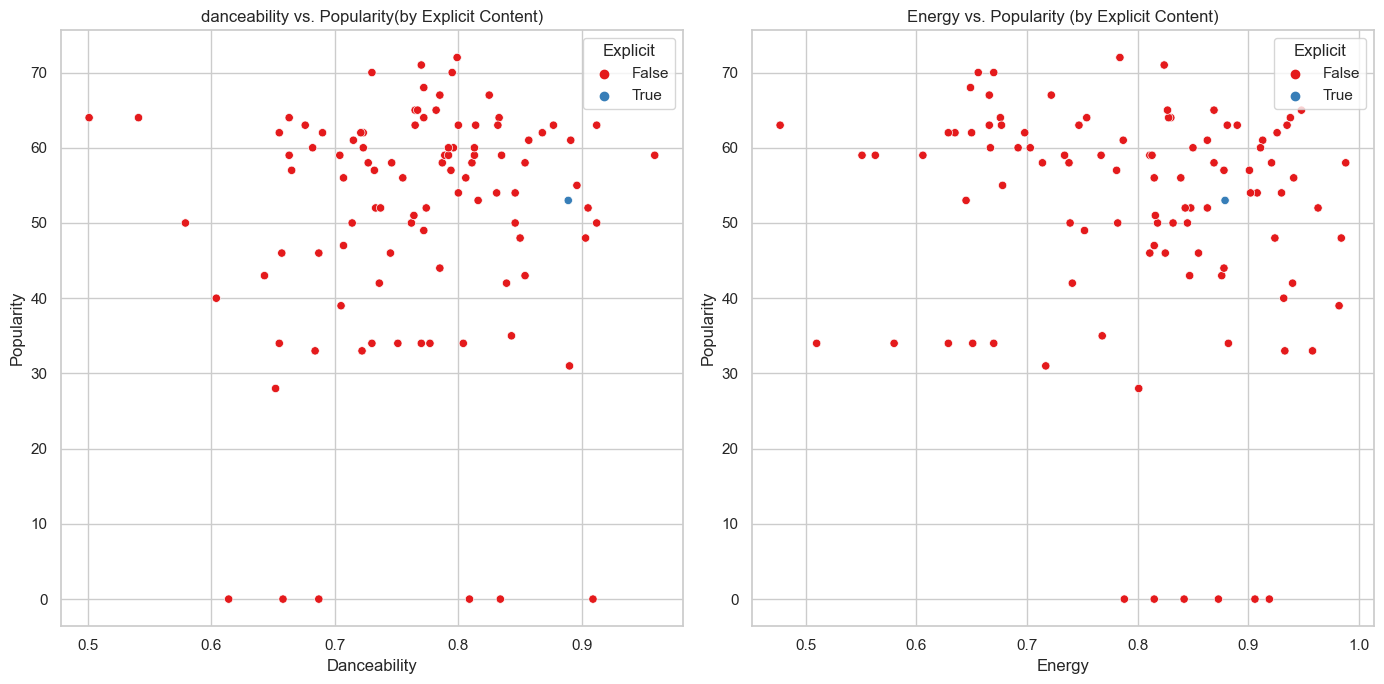

In [41]:
plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 1)
sns.scatterplot(x='Danceability', y='Popularity', hue='Explicit', data=music_data_cleaned, palette='Set1')
plt.title('danceability vs. Popularity(by Explicit Content)')
plt.xlabel('Danceability')
plt.ylabel('Popularity')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Energy', y='Popularity', hue='Explicit', data=music_data_cleaned, palette='Set1')
plt.title('Energy vs. Popularity (by Explicit Content)')
plt.xlabel('Energy')
plt.ylabel('Popularity')

plt.tight_layout()
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

music_data_cleaned['Explicit'] = music_data_cleaned['Explicit'].astype(int)

features = ['Danceability', 'Energy', 'Loudness', 'Acousticness', 'Valence', 'Explicit', 'Key', 'Mode', 'Speechiness', 'Instrumentalness', 'Tempo']
X = music_data_cleaned[features]
y = music_data_cleaned['Popularity']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


coefficients = pd.Series(model.coef_, index=features)
coefficients

Danceability        1.249640e+00
Energy             -3.204815e+00
Loudness            1.141456e+00
Acousticness        2.469403e+00
Valence             2.125671e+00
Explicit           -2.886580e-15
Key                -3.189486e+00
Mode               -5.859715e+00
Speechiness         3.398224e-02
Instrumentalness    3.390750e-01
Tempo              -1.865736e+00
dtype: float64